Exercise for fraud detection example of the book :  [Machine Learning for Finance](https://www.packtpub.com/big-data-and-business-intelligence/machine-learning-finance)

In [2]:
import pandas as pd
import tensorflow as tf
import numpy as np
from my_utils import *

In [3]:
df_orig = pd.read_csv("data/PS_20174392719_1491204439457_log.csv")

In [4]:
df_orig['Fraud_Heuristic']=np.where(((df_orig['type'] == 'TRANSFER') & (df_orig['amount'] > 200000)) ,1,0)

In [5]:
df_orig.head(5) 

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Fraud_Heuristic
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0


In [6]:
from sklearn.metrics import f1_score

In [54]:
df = df_orig[(df_orig.type=='TRANSFER') | (df_orig.type=='CASH_OUT')]
f1_baseline = f1_score(y_pred=df['Fraud_Heuristic'], y_true=df['isFraud'])

In [55]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


In [56]:
cm = confusion_matrix(y_pred=df['Fraud_Heuristic'], y_true=df['isFraud'])

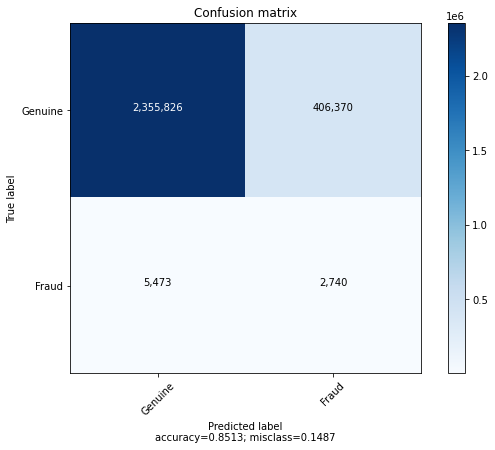

In [57]:
plot_confusion_matrix(cm,['Genuine','Fraud'], normalize=False)

In [58]:
df['hour'] = df['step'] % 24
frauds = []
genuine = []
for i in range(24):
    f = len(df[(df['hour'] == i) & (df['isFraud'] == 1) ])
    g = len(df[(df['hour'] == i) & (df['isFraud'] == 0)])
    frauds.append(f)
    genuine.append(g)

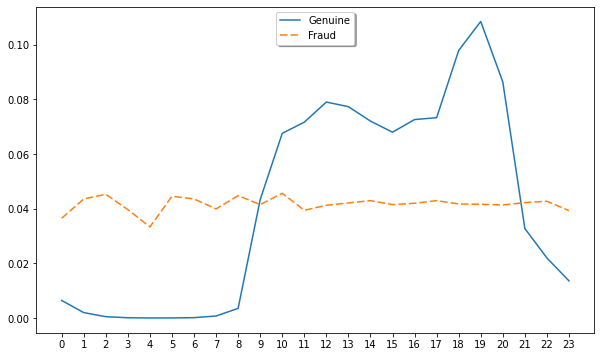

In [59]:
fig , ax = plt.subplots(figsize=(10,6))
ax.plot(genuine/np.sum(genuine), label='Genuine' )
ax.plot(frauds/np.sum(frauds), dashes=[5,2], label='Fraud')
plt.xticks(np.arange(24))
legend = ax.legend(loc='upper center', shadow=True)

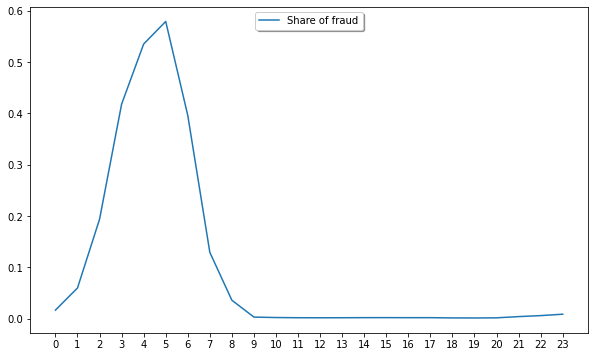

In [60]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(np.divide(frauds,np.add(genuine,frauds)), label='Share of fraud')
plt.xticks(np.arange(24))
legend = ax.legend(loc='upper center', shadow=True)

In [61]:
# Check whether fraudster tranfer money to account which owned by a fraudster too  then take money from  ATM
dfFraudTransfer = df[(df.isFraud == 1) & (df.type == 'TRANSFER')]
dfFraudCashOut = df[(df.isFraud == 1 ) & (df.type == 'CASH_OUT')]
dfFraudTransfer.nameDest.isin(dfFraudCashOut.nameOrig).any()

False

In [62]:
# investage ratio of  the balance  before and after transaction are zero 
dfOdd = df[(df.oldbalanceDest == 0) & 
        (df.newbalanceDest == 0) &
        (df.amount)]
len(dfOdd[(df.isFraud == 1)]) / len(dfOdd)

0.7046398891966759

In [63]:
len(dfOdd[(dfOdd.oldbalanceOrg < dfOdd.amount)]) / len(dfOdd)

0.21762465373961218

In [64]:
df['type'] = 'Type_' + df['type'].astype(str)
dummies = pd.get_dummies(df['type'])


In [65]:
dummies.head()

,Type_CASH_OUT,Type_TRANSFER
2,0,1
3,1,0
15,1,0
19,0,1
24,0,1


In [66]:
df_dummy = pd.concat([df,dummies], axis=1)
df_dummy.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Fraud_Heuristic,hour,Type_CASH_OUT,Type_TRANSFER
2,1,Type_TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,0,1,0,1
3,1,Type_CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,0,1,1,0
15,1,Type_CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,0,1,1,0
19,1,Type_TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,1,1,0,1
24,1,Type_TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,1,1,0,1


In [67]:
dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2770409 entries, 2 to 6362619
Data columns (total 2 columns):
 #   Column         Dtype
---  ------         -----
 0   Type_CASH_OUT  uint8
 1   Type_TRANSFER  uint8
dtypes: uint8(2)
memory usage: 106.4 MB


In [68]:
del df_dummy['type']

In [22]:
df_dummy.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Fraud_Heuristic,hour,Type_CASH_OUT,Type_TRANSFER
2,1,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,0,1,0,1
3,1,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,0,1,1,0
15,1,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,0,1,1,0
19,1,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,1,1,0,1
24,1,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,1,1,0,1


In [69]:
df = df.drop(['nameOrig','nameDest','Fraud_Heuristic'], axis=1)

In [70]:
df['isNight'] =np.where((2<=df['hour']) & (df['hour'] <=6), 1, 0)

In [71]:
y_df = df['isFraud']
x_df = df.drop('isFraud',axis=1)
y = y_df.values
X = x_df.values

In [72]:
from sklearn.model_selection import train_test_split


In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state =42)

In [74]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                                    test_size=0.1, 
                                                    random_state=42)

In [95]:
#!pip install imblearn
#!pip install scikit-learn -U

You should consider upgrading via the '/Users/steven/GIT/ml/my_env/bin/python -m pip install --upgrade pip' command.


In [96]:
import sklearn

import imblearn
sklearn.__version__ , imblearn.__version__

('0.22.2.post1', '0.7.0')

In [97]:
# SMOTE , Synthetic Minority Over-sampling Technique
# http://contrib.scikitlearn.org/imbalanced-learn/
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

AttributeError: 'SMOTE' object has no attribute '_validate_data'

In [23]:
# Embedding process
map_dict = {}
for token, value in enumerate(df_orig['type'].unique()):
    map_dict[value] = token
map_dict

{'PAYMENT': 0, 'TRANSFER': 1, 'CASH_OUT': 2, 'DEBIT': 3, 'CASH_IN': 4}

In [24]:
df = df_orig.copy()

In [28]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Fraud_Heuristic
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0


In [29]:
df["type"].replace(map_dict, inplace=True)

In [30]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Fraud_Heuristic
0,1,0,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0
1,1,0,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0
2,1,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0
3,1,2,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,0
4,1,0,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0


In [48]:
df = df.drop(['nameDest','nameOrig','step'],axis=1)
other_cols = [c for c in df.columns if (( c != 'type') and (c !='isFraud'))]

In [49]:
from tensorflow.keras.layers import Input, Embedding, Reshape, Dense , Concatenate, Activation
from tensorflow.keras import Model

In [50]:
inputs = []
outputs = []
num_types = len(df['type'].unique())
type_embedding_dim = 3

type_in = Input(shape=(1,))
type_embedding = Embedding(num_types, type_embedding_dim, input_length=1)(type_in)

type_out = Reshape(target_shape = (type_embedding_dim,))(type_embedding)

type_model = Model(type_in, type_out)

inputs.append(type_in)
outputs.append(type_out)

In [51]:
num_rest = len(other_cols)

rest_in = Input(shape=(num_rest,))
rest_out = Dense(16)(rest_in)

rest_model = Model(rest_in, rest_out)

inputs.append(rest_in)
outputs.append(rest_out)

In [52]:
concatenated = Concatenate()(outputs)
x = Dense(16)( concatenated )
x = Activation('sigmoid')(x)
x = Dense(1)(x)
model_out = Activation('sigmoid')(x)

merged_model = Model(inputs, model_out)
merged_model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [53]:
# Training model
types = df['type']
rest = df[other_cols]
target = df['isFraud']
history = merged_model.fit([types.values, rest.values], target.values, epochs =1, batch_size=128)

Train on 6362620 samples
6362620/6362620 [==============================] - 67s 11us/sample - loss: 0.0109 - acc: 0.9987
